In [7]:
import networkx as nx

In [15]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tree = ET.parse("dolphins.graphml")  
root = tree.getroot()
ns = {"graphml": "http://graphml.graphdrawing.org/xmlns"}


G = nx.Graph() 


for node in root.findall(".//graphml:node", ns):
    node_id = node.attrib["id"]
    

    label = node.find(".//graphml:data[@key='key4']", ns)  
    node_label = label.text if label is not None else node_id  

    G.add_node(node_id, label=node_label)

# Extract Edges
for edge in root.findall(".//graphml:edge", ns):
    source = edge.attrib["source"]
    target = edge.attrib["target"]
    G.add_edge(source, target)




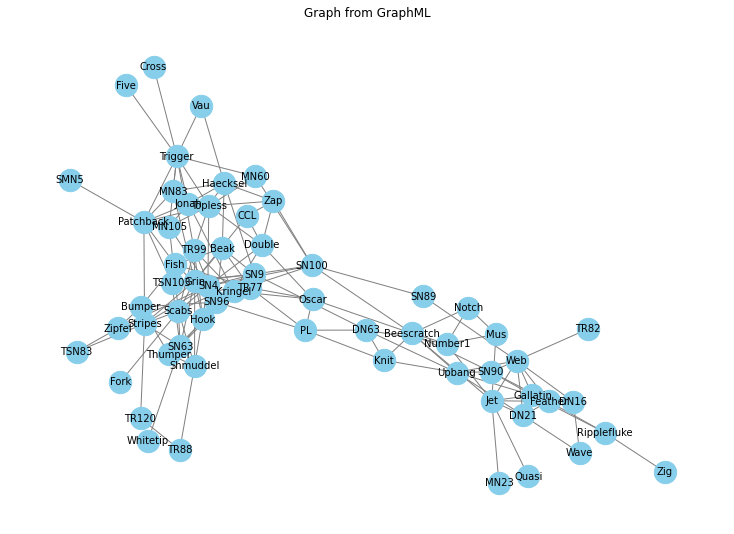

In [16]:

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  
labels = {node: G.nodes[node]["label"] for node in G.nodes}  

nx.draw(G, pos, with_labels=True, labels=labels, node_color="skyblue", edge_color="gray", node_size=500, font_size=10)
plt.title("Graph from GraphML")
plt.show()

In [17]:
import numpy as np

A = nx.adjacency_matrix(G)

In [18]:
import copy

In [19]:
dense_matrix = A.toarray()
print(dense_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [43]:
def transform_w_to_m_hat(W):
    return np.where(W > 1, 1, np.where(W < -1, -1, W))

def matrix_b(m, variance_k=False):
    matrix = copy.deepcopy(m)

    M_max = np.max(np.abs(matrix))
    if M_max != 0:
        matrix = matrix / M_max

    U, S, Vh = np.linalg.svd(matrix, full_matrices=False)

    n = matrix.shape[0]
    p_hat = 1 


    
    if variance_k:
        sigma_squared = np.var(matrix)  
        q_hat = p_hat * sigma_squared + p_hat * (1 - p_hat) * (1 - sigma_squared)
        threshold = 2.02 * np.sqrt(n * q_hat)
        print(threshold, (2.02 * np.sqrt(n * p_hat)))
        
    else:
        threshold = 2.02 * np.sqrt(n * p_hat)


    S_indices = np.where(S >= threshold)[0]

    
    W = sum(S[i] * np.outer(U[:, i], Vh[i, :]) for i in S_indices)
    matrix = transform_w_to_m_hat(W)

    return matrix

In [45]:
result = matrix_b(dense_matrix, variance_k=True)

4.38145695285335 15.905495905503859


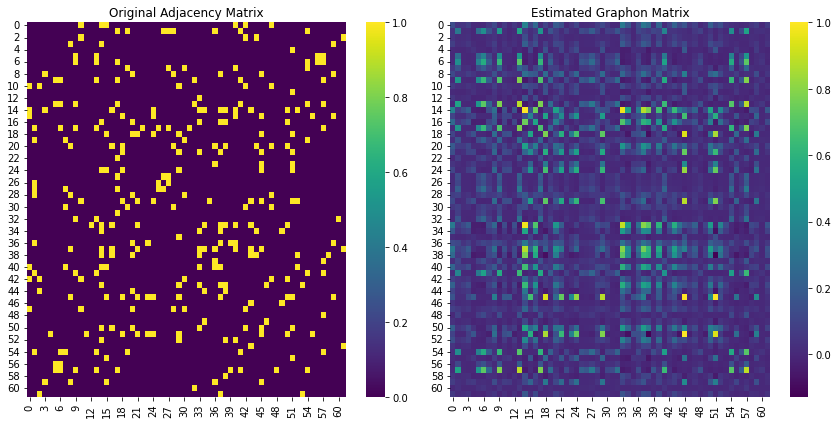

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.heatmap(dense_matrix, ax=axes[0], cmap="viridis", cbar=True)
axes[0].set_title("Original Adjacency Matrix")


sns.heatmap(result, ax=axes[1], cmap="viridis", cbar=True)
axes[1].set_title("Estimated Graphon Matrix")


plt.tight_layout()
plt.show()

In [47]:
diff = (result - dense_matrix)

In [48]:
diff

array([[ 1.35572714e-01,  4.28496489e-02,  4.72898902e-02, ...,
         7.27779526e-02, -8.42638540e-05,  6.14485293e-02],
       [ 4.28496489e-02,  3.23682192e-01,  1.49317951e-02, ...,
         2.70818284e-02,  2.87315038e-02,  1.42847711e-02],
       [ 4.72898902e-02,  1.49317951e-02,  1.79878722e-02, ...,
         1.27745825e-02, -1.72277828e-04, -9.76730882e-01],
       ...,
       [ 7.27779526e-02,  2.70818284e-02,  1.27745825e-02, ...,
         1.45691214e-01,  1.52882397e-03,  1.74157623e-02],
       [-8.42638540e-05,  2.87315038e-02, -1.72277828e-04, ...,
         1.52882397e-03,  2.68011490e-03, -6.88480710e-04],
       [ 6.14485293e-02,  1.42847711e-02, -9.76730882e-01, ...,
         1.74157623e-02, -6.88480710e-04,  3.01921105e-02]])

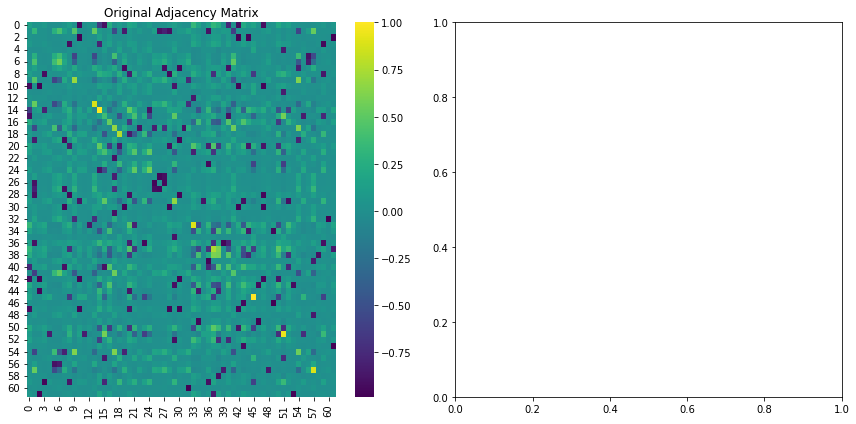

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(diff, ax=axes[0], cmap="viridis", cbar=True)
axes[0].set_title("Original Adjacency Matrix")
plt.tight_layout()
plt.show()